In [138]:
%config InlineBackend.figure_formats = {"retina", "png"}

import os
import tempfile
import pint

ureg = pint.UnitRegistry()
os.environ["OPENBLAS_NUM_THREADS"] = "1"

from IPython.display import HTML, display
import h5py
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (5, 4)

import tdgl
from tdgl.geometry import box, circle
from tdgl.visualization.animate import create_animation

### Superconductive Film

In [139]:
length_units = "nm"
# Material parameters from Petrovic
xi = 13
london_lambda = 39
d = 25
layer = tdgl.Layer(coherence_length=xi, london_lambda=london_lambda, thickness=d, gamma=1)

# Device geometry
total_width = 512
total_length = 512
link_width = total_width / 3
# Outer geometry of the film
film = (
    tdgl.Polygon("film", points=box(total_width, total_length))
    .resample(401)
    .buffer(0)
)

# Current terminals
source = (
    tdgl.Polygon("source", points=box(1.1 * total_width, total_length / 100))
    .translate(dy=total_length / 2)
)
drain = source.scale(yfact=-1).set_name("drain")
#  Voltage measurement points
probe_points = [(0, total_length / 2.5), (0, -total_length / 2.5)]

In [140]:
device = tdgl.Device(
    "small_square", #512x512 nm
    layer=layer,
    film=film,
    terminals=[source,drain],
    probe_points=probe_points,
    length_units=length_units,
)

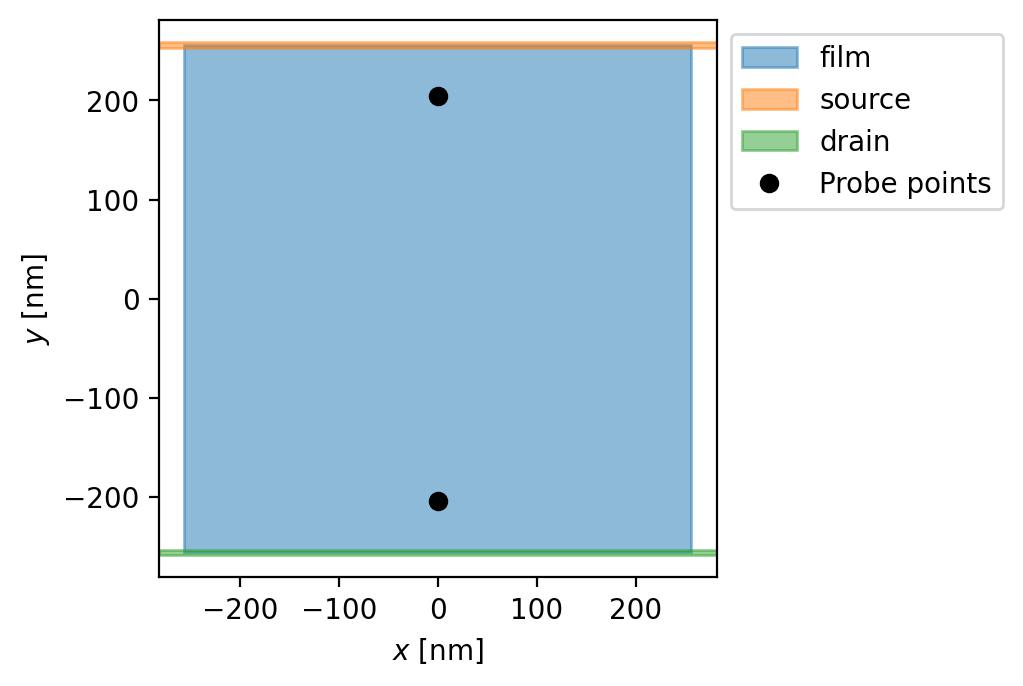

In [141]:
fig, ax = device.draw()

In [145]:
device.make_mesh(max_edge_length=xi / 2, smooth=100)

Constructing Voronoi polygons:   0%|          | 0/21531 [00:00<?, ?it/s]Malformed Voronoi cell surrounding boundary site 1. Try changing the number of boundary mesh sites using Polygon.resample() or Polygon.buffer(eps) where eps is 0 or a small positive float.
Malformed Voronoi cell surrounding boundary site 2. Try changing the number of boundary mesh sites using Polygon.resample() or Polygon.buffer(eps) where eps is 0 or a small positive float.
Malformed Voronoi cell surrounding boundary site 11. Try changing the number of boundary mesh sites using Polygon.resample() or Polygon.buffer(eps) where eps is 0 or a small positive float.
Malformed Voronoi cell surrounding boundary site 12. Try changing the number of boundary mesh sites using Polygon.resample() or Polygon.buffer(eps) where eps is 0 or a small positive float.
Malformed Voronoi cell surrounding boundary site 14. Try changing the number of boundary mesh sites using Polygon.resample() or Polygon.buffer(eps) where eps is 0 or a sm

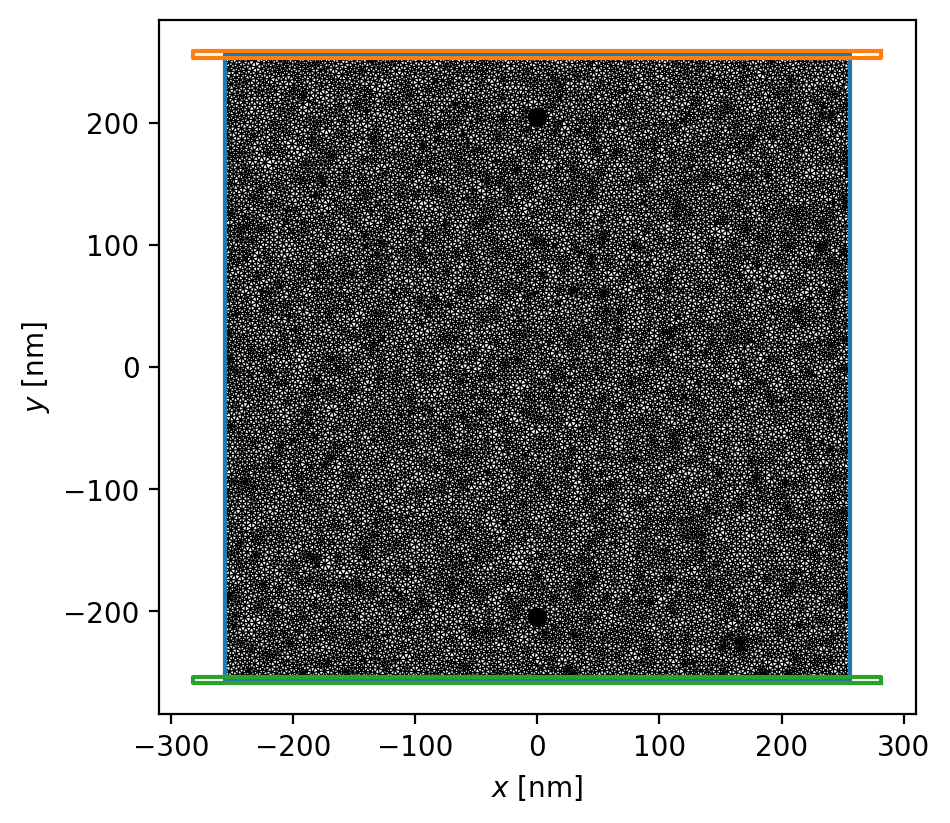

In [ ]:
fig, ax = device.plot(mesh=True, legend=False)

In [ ]:
device.mesh_stats()

num_sites,21531
num_elements,42602
min_edge_length,1.613e+00
max_edge_length,6.636e+00
mean_edge_length,3.785e+00
min_area,2.277e+00
max_area,2.754e+01
mean_area,1.218e+01
coherence_length,13
length_units,nm


### Example Code

In [ ]:
"""
Example code
"""

# import numpy as np

# from ..em import uniform_Bz_vector_potential, ureg
# from ..parameter import Parameter


# def constant_field_vector_potential(
#     x,
#     y,
#     z,
#     *,
#     Bz: float,
#     field_units: str = "mT",
#     length_units: str = "um",
# ):
#     if z.ndim == 0:
#         z = z * np.ones_like(x)
#     positions = np.array([x.squeeze(), y.squeeze(), z.squeeze()]).T
#     positions = (positions * ureg(length_units)).to("m").magnitude
#     Bz = Bz * ureg(field_units)
#     A = uniform_Bz_vector_potential(positions, Bz)
#     return A.to(f"{field_units} * {length_units}").magnitude


# def ConstantField(
#     value: float = 0, field_units: str = "mT", length_units: str = "um"
# ) -> Parameter:
#     """Returns a Parameter that computes a constant as a function of ``x, y, z``.
#     Args:
#         value: The constant value of the field.
#     Returns:
#         A Parameter that returns ``value`` at all ``x, y, z``.
#     """
#     return Parameter(
#         constant_field_vector_potential,
#         Bz=float(value),
#         field_units=field_units,
#         length_units=length_units,
#     )
# def uniform_Bz_vector_potential(
#     positions: np.ndarray,
#     Bz: Union[float, str, pint.Quantity],
# ) -> np.ndarray:
#     """Calculates the magnetic vector potential [Ax, Ay, Az] at ``positions``
#     due uniform magnetic field along the z-axis with strength ``Bz``.

#     Args:
#         positions: Shape (n, 3) array of (x, y, z) positions in meters at which to
#             evaluate the vector potential.
#         Bz: The strength of the uniform field, as a pint-parseable string,
#             a pint.Quantity, or a float with units of Tesla.

#     Returns:
#         Shape (n, 3) array of the vector potential [Ax, Ay, Az] at ``positions``
#         in units of Tesla * meter.
#     """
#     assert isinstance(Bz, (float, str, pint.Quantity)), type(Bz)
#     positions = np.atleast_2d(positions)
#     assert positions.shape[1] == 3, positions.shape
#     if not isinstance(positions, pint.Quantity):
#         positions = positions * ureg("meter")
#     if isinstance(Bz, str):
#         Bz = ureg(Bz)
#     if isinstance(Bz, float):
#         Bz = Bz * ureg("tesla")
#     xs = positions[:, 0]
#     ys = positions[:, 1]
#     dx = np.ptp(xs)
#     dy = np.ptp(ys)
#     xs = xs - (xs.min() + dx / 2)
#     ys = ys - (ys.min() + dy / 2)
#     Ax = -Bz * ys / 2
#     Ay = Bz * xs / 2
#     A = np.stack([Ax, Ay, np.zeros_like(Ax)], axis=1)
#     return A.to("tesla * meter")

#  self.dynamic_vector_potential = (
#             isinstance(applied_vector_potential, Parameter)
#             and applied_vector_potential.time_dependent
#         )
#         if not callable(applied_vector_potential):
#             applied_vector_potential = ConstantField(
#                 applied_vector_potential,
#                 field_units=field_units,
#                 length_units=device.length_units,
#             )
#         self.applied_vector_potential = applied_vector_potential
#         # Evaluate the vector potential
#         self.A_scale = (
#             (ureg(field_units) * length_units / (Bc2 * xi * length_units))
#             .to_base_units()
#             .magnitude
#         )
#         A_kwargs = dict(t=0) if self.dynamic_vector_potential else dict()
#         current_A_applied = self.applied_vector_potential(
#             self.edge_centers[:, 0], self.edge_centers[:, 1], self.z0, **A_kwargs
#         )
#         current_A_applied = self.A_scale * np.asarray(current_A_applied)[:, :2]
#         if current_A_applied.shape != self.edge_centers.shape:
#             raise ValueError(
#                 f"Unexpected shape for vector_potential: {current_A_applied.shape}."
#             )

### Vector potential calculation

In [187]:
"""
Vector potential calcuations
"""
from scipy import interpolate
from tdgl import Parameter
CURRENT_DIRECTORY = os.getcwd()
DATA_AND_LAYER_NAME = "B_demag_125mT_0K_layer2"
DEMAG_B_Z_FILEPATH = os.path.join(CURRENT_DIRECTORY, "mumax_fields", "%s_z.npy" % DATA_AND_LAYER_NAME)
DEMAG_B_Z = np.load(DEMAG_B_Z_FILEPATH)
APPLIED_B_Z = 0.125
B_Z = DEMAG_B_Z + APPLIED_B_Z
# B_Z = np.reshape(B_Z, (np.shape(B_Z)[0] * np.shape(B_Z)[1], 1))

def textured_vector_potential(
    positions,
    Bz,
):
    """
    Calculates the magnetic vector potential [Ax, Ay, Az] at ``positions``
    due uniform magnetic field along the z-axis with strength ``Bz``.

    Args:
    positions: Shape (n, 3) array of (x, y, z) positions in meters at which to
        evaluate the vector potential.
    Bz: The strength of the the field with shape (m, m) with units of Tesla, where
    m is the size of the Mumax simulation

    Returns:
    Shape (n, 3) array of the vector potential [Ax, Ay, Az] at ``positions``
    in units of Tesla * meter.

    """
    # assert isinstance(Bz, (float, str, pint.Quantity)), type(Bz)
    # positions = np.atleast_2d(positions)
    # assert positions.shape[1] == 3, positions.shape
    # if not isinstance(positions, pint.Quantity):
    #     positions = positions * ureg("meter")
    # if isinstance(Bz, str):
    #     Bz = ureg(Bz)
    # if isinstance(Bz, float):
    #     Bz = Bz * ureg("tesla")


    # Assuming 'positions' is already defined as in the previous example
    # Extract the x and y values from the positions array

    xy_vals = positions[:, :2]
    
    # Calculate the range (peak-to-peak) of x and y values
    dx = np.ptp(xy_vals[:, 0])
    dy = np.ptp(xy_vals[:, 1])
    # Calculate the center point for x and y
    center_x = np.min(xy_vals[:, 0]) + dx / 2
    center_y = np.min(xy_vals[:, 1]) + dy / 2
    center = np.array([center_x, center_y])
    # Subtract the center point from all xy values to center the data
    xy_vals_centered = xy_vals - center
    centered_xs = xy_vals_centered[:, 0]
    centered_ys = xy_vals_centered[:, 1]
    # make a grid equally sized as the positions but with spacings equivalent to the Mumax mesh
    grid_xs = np.linspace(centered_xs.min(), centered_xs.max(), np.shape(Bz)[0])
    grid_ys = np.linspace(centered_ys.min(), centered_ys.max(), np.shape(Bz)[1])
    X,Y = np.meshgrid(grid_xs, grid_ys)
    Bz_points = np.vstack([X.ravel(), Y.ravel()]).T
    
    # reshape Bz from 128x128 in Mumax into 128^2 by 2
    flattened_Bz_values = np.reshape(Bz, (np.shape(Bz)[0] * np.shape(Bz)[1], 1))

    # interpolate to find Bz at positions
    interpolated_Bz = interpolate.griddata(Bz_points, flattened_Bz_values, xy_vals_centered)
    interpolated_Bz = interpolated_Bz*ureg("tesla")
    centered_ys = centered_ys*ureg("meter")
    centered_xs = centered_xs*ureg("meter")

    # x-y component of vector potential
    Axy = interpolated_Bz * np.stack([centered_ys, -1*centered_ys], axis=1)
    
    A = np.hstack([Axy, np.zeros_like(Axy[:,:1])])
    
    A = A.to("tesla * meter")
    
    return A

def FM_field_vector_potential(
    x,
    y,
    z,
    *,
    field_units: str = "T",
    length_units: str = "um",
):
    if z.ndim == 0:
        z = z * np.ones_like(x)
    positions = np.array([x.squeeze(), y.squeeze(), z.squeeze()]).T
    positions = (positions * ureg(length_units)).to("m").magnitude
    Bz = B_Z * ureg(field_units)
    A = textured_vector_potential(positions, Bz)
    return A.to(f"{field_units} * {length_units}").magnitude

def FMField(
    field_units: str = "T", length_units: str = "um"
) -> Parameter:
    """Returns a Parameter that computes a constant as a function of ``x, y, z``.
    Args:
        value: The constant value of the field.
    Returns:
        A Parameter that returns ``value`` at all ``x, y, z``.
    """
    return Parameter(
        FM_field_vector_potential,
        field_units=field_units,
        length_units=length_units,
    )


### FM Solution

In [198]:
options = tdgl.SolverOptions(
    solve_time=400,
    output_file=os.path.join("tdgl_results", "skyrmions_please.h5"),
    field_units="T",
    current_units="uA",
    gpu=True,
)
from fmfield import FMField
mumax_solution = tdgl.solve(
    device,
    options,
    applied_vector_potential=FMField(),
    terminal_currents=dict(source=0, drain=-0),
)

c:\Users\jsche\Documents\GitHub\tdgl\.conda\Lib\site-packages\scipy\interpolate\_ndgriddata.py:264: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  ip = LinearNDInterpolator(points, values, fill_value=fill_value,
Output file already exists. Renaming to tdgl_results\skyrmions_please-5.h5.
Simulating: 100%|█████████▉| 400/400 [09:48<00:00,  1.47s/tau ]     


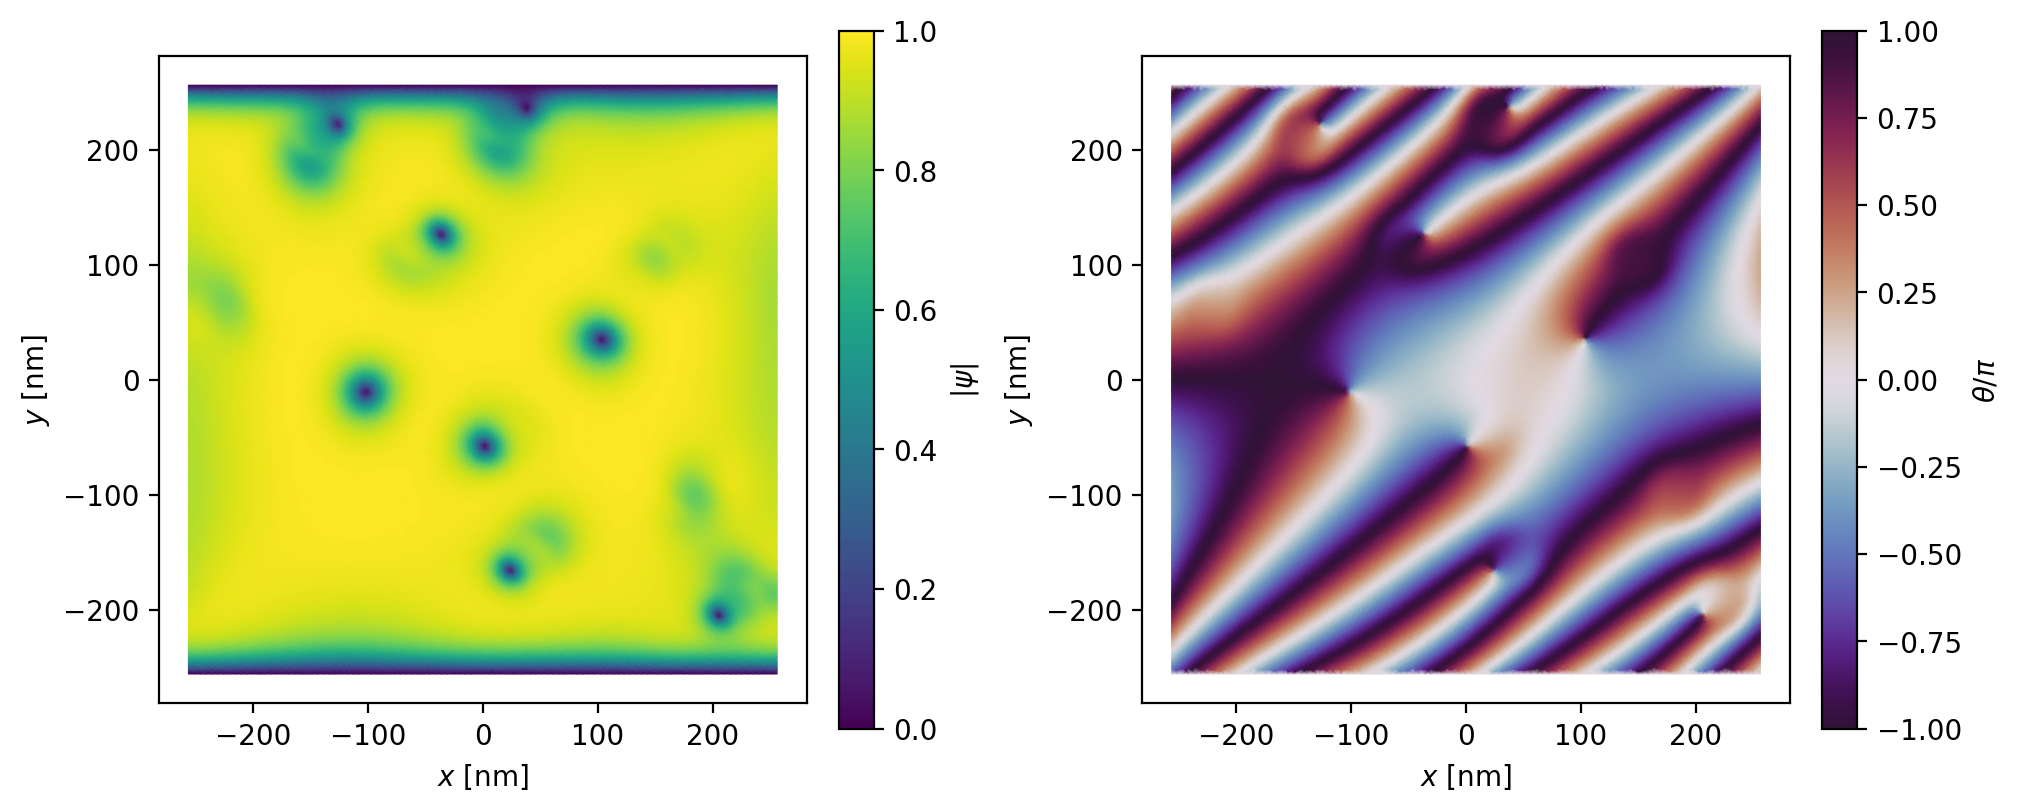

In [200]:
fig, axes   = mumax_solution.plot_order_parameter(figsize=(10, 4))

In [ ]:
print(np.shape(device.mesh.edge_mesh.edges))
print(np.shape(device.mesh.sites))


(64132, 2)
(21531, 2)


In [ ]:
options = tdgl.SolverOptions(
    solve_time=200,
    output_file=os.path.join("tdgl_results", "skyrmions_please.h5"),
    field_units="T",
    current_units="uA",
)

# RAMP_FIELD = True

# if RAMP_FIELD:
#     from tdgl.sources import LinearRamp, ConstantField

#     # Ramp the applied field from 0 to 0.4 mT between t=0 and t=100, then hold it at 0.4 mT.
#     applied_vector_potential = (
#         LinearRamp(tmin=0, tmax=100)
#         * ConstantField(25, field_units=options.field_units, length_units=device.length_units)
#     )
# else:
#     # If applied_vector_potential is given as a single number,
#     # it is interpreted to mean the vector potential associated with a
#     # uniform out-of-plane magnetic field with the specified strength.
#     # This is simply shorthand for
#     # ConstantField(0.4, field_units=options.field_units, length_units=device.length_units).
#     applied_vector_potential = 25

field_current_solution = tdgl.solve(
    device,
    options,
    applied_vector_potential=.125,
    terminal_currents=dict(source=12, drain=-12),
    # The seed solution will be used as the initial state of the film.
)

Output file already exists. Renaming to tdgl_results\skyrmions_please-3.h5.
Simulating:   8%|▊         | 17/200 [01:01<11:19,  3.70s/tau ]


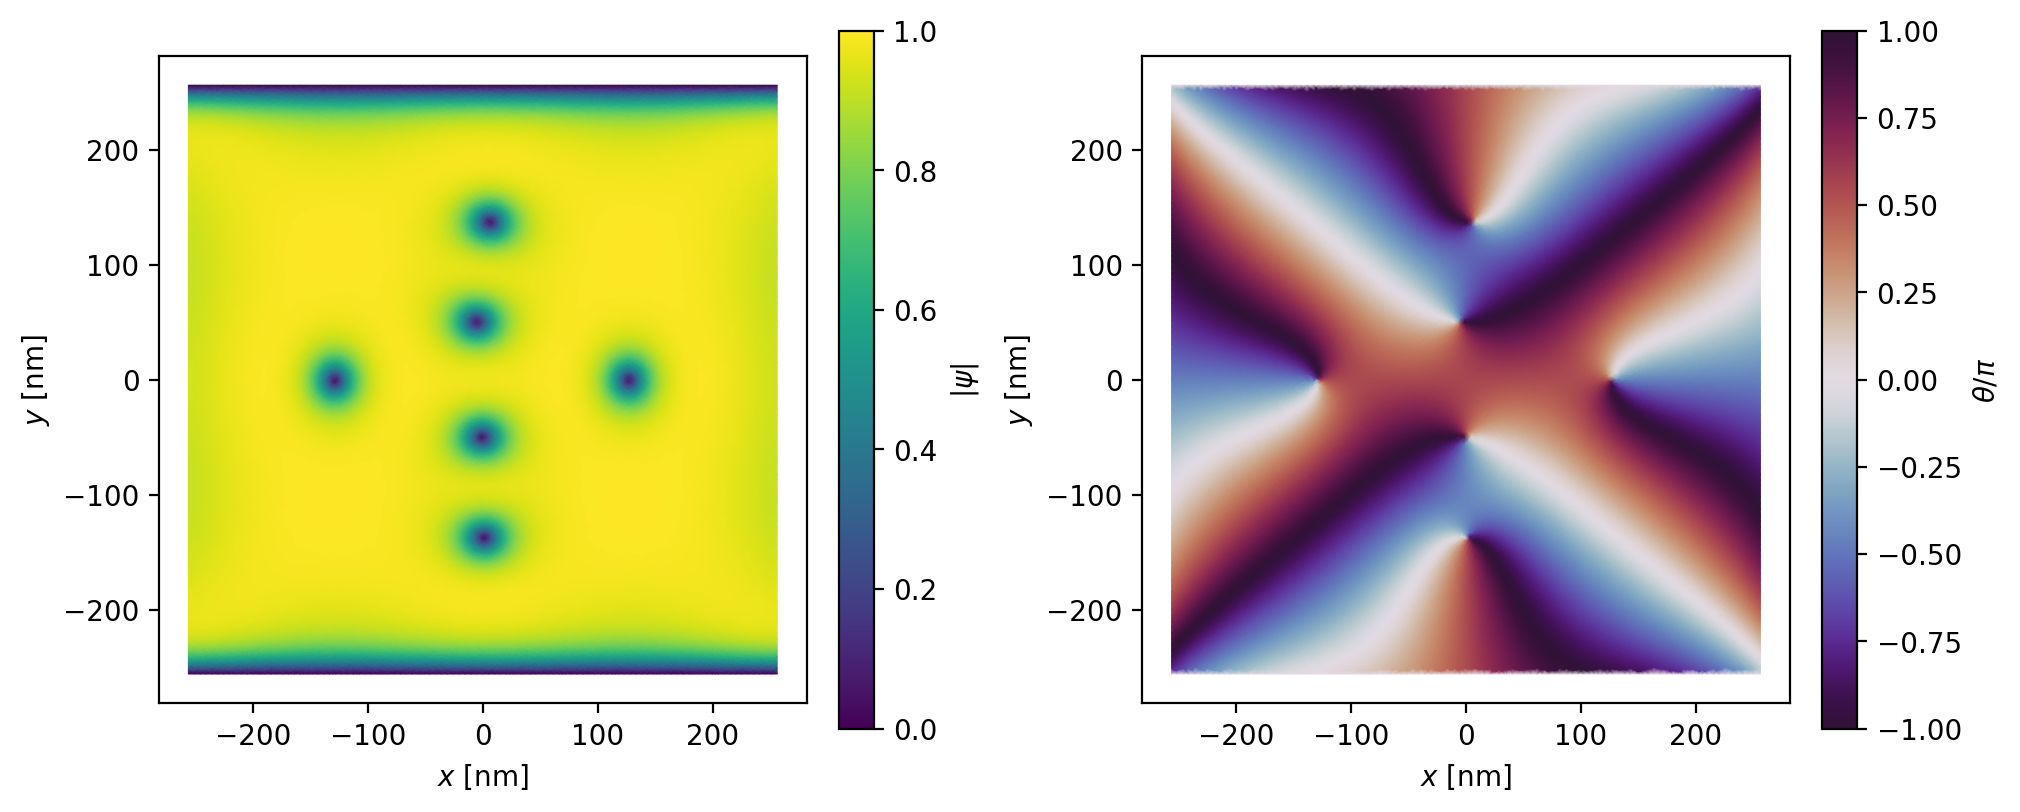

In [ ]:
fig, axes   = field_current_solution.plot_order_parameter(figsize=(10, 4))

In [196]:
def make_video_from_solution(
    solution,
    quantities=("order_parameter", "phase"),
    fps=20,
    figsize=(5, 4),
):
    """Generates an HTML5 video from a tdgl.Solution."""
    with tdgl.non_gui_backend():
        with h5py.File(solution.path, "r") as h5file:
            anim = create_animation(
                h5file,
                quantities=quantities,
                fps=fps,
                figure_kwargs=dict(figsize=figsize),
            )
            video = anim.to_html5_video()
        return HTML(video)

In [199]:
MAKE_ANIMATIONS=True
if MAKE_ANIMATIONS:
    mumax_FM_field_video = make_video_from_solution(
        mumax_solution,
        quantities=["order_parameter", "phase", "scalar_potential"],
        figsize=(6.5, 4),
    )
    display(mumax_FM_field_video)